<a href="https://colab.research.google.com/github/umamaheshwari1010/Telco_churn_project/blob/main/Customer_churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('telco_churn.csv')
print(df.head())
print(df.info())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [ ]:
pd.isnull(df).sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
print(df.duplicated().sum())

0


In [ ]:
df['TotalCharges'].dtype

dtype('O')

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
df['TotalCharges'].dtype

dtype('float64')

In [ ]:
print(df['TotalCharges'].isnull().sum())

11


In [ ]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

/tmp/ipython-input-1854230864.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


In [ ]:
for col in ['Contract', 'PaymentMethod', 'InternetService', 'Churn']:
    print(f"{col}: {df[col].unique()}")

Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
InternetService: ['DSL' 'Fiber optic' 'No']
Churn: ['No' 'Yes']


In [ ]:
df_encoded = pd.get_dummies(df, columns=['Contract', 'PaymentMethod', 'InternetService', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'], drop_first=True)
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes': 1, 'No': 0})

In [ ]:
print(df_encoded.head())

   customerID  tenure PaperlessBilling  MonthlyCharges  TotalCharges  Churn  \
0  7590-VHVEG       1              Yes           29.85         29.85      0   
1  5575-GNVDE      34               No           56.95       1889.50      0   
2  3668-QPYBK       2              Yes           53.85        108.15      1   
3  7795-CFOCW      45               No           42.30       1840.75      0   
4  9237-HQITU       2              Yes           70.70        151.65      1   

   Contract_One year  Contract_Two year  \
0              False              False   
1               True              False   
2              False              False   
3               True              False   
4              False              False   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  ...  \
0                                  False                            True  ...   
1                                  False                           False  ...   
2                      

In [ ]:
df_encoded.drop('customerID', axis=1, inplace=True, errors='ignore')

In [ ]:
import sqlite3
conn = sqlite3.connect('telco.db')
df.to_sql('churn', conn, if_exists='replace', index=False)

7043

In [ ]:
# Query: Average tenure by churn status
query = "SELECT Churn, AVG(tenure) as avg_tenure FROM churn GROUP BY Churn;"
result = pd.read_sql(query, conn)
print(result)

  Churn  avg_tenure
0    No   37.569965
1   Yes   17.979133


In [ ]:
# Query: Churn count by contract type
query = "SELECT Contract, COUNT(*) as count FROM churn WHERE Churn='Yes' GROUP BY Contract;"
result = pd.read_sql(query, conn)
print(result)

         Contract  count
0  Month-to-month   1655
1        One year    166
2        Two year     48


In [ ]:
result.to_csv('sql_churn_by_contract.csv', index=False)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

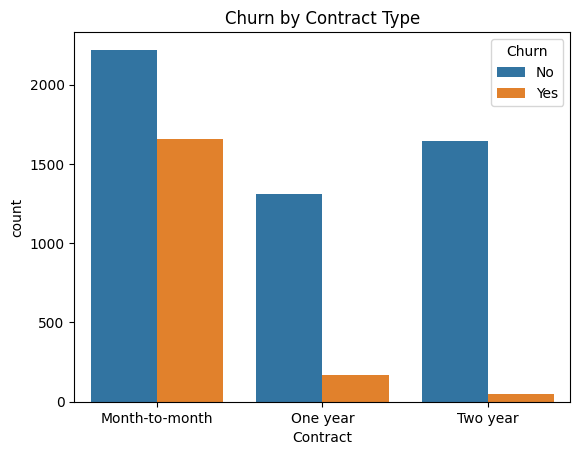

In [ ]:
# Churn by contract type
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.savefig('churn_by_contract.png')
plt.show()

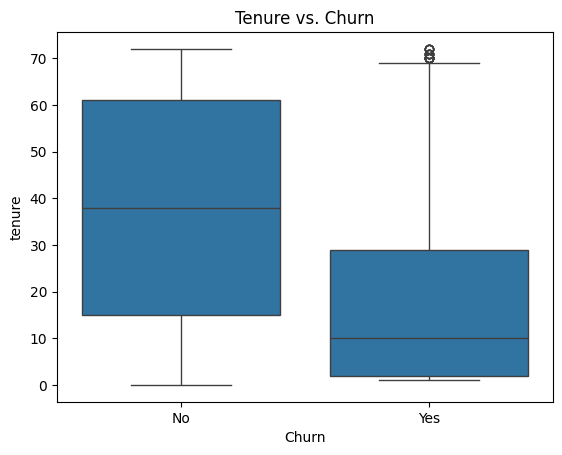

In [ ]:
# Tenure vs. Churn
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs. Churn')
plt.savefig('tenure_vs_churn.png')
plt.show()

In [ ]:
df_encoded.dtypes

,0
tenure,int64
PaperlessBilling,object
MonthlyCharges,float64
TotalCharges,float64
Churn,int64
Contract_One year,bool
Contract_Two year,bool
PaymentMethod_Credit card (automatic),bool
PaymentMethod_Electronic check,bool
PaymentMethod_Mailed check,bool


In [ ]:
print(df_encoded['PaperlessBilling'].unique())

['Yes' 'No']


In [ ]:
df_encoded['PaperlessBilling'] = df_encoded['PaperlessBilling'].map({'Yes': 1, 'No': 0})
print(df_encoded['PaperlessBilling'].unique())

[1 0]


In [ ]:
print(df_encoded.dtypes)

tenure                                     int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
Contract_One year                           bool
Contract_Two year                           bool
PaymentMethod_Credit card (automatic)       bool
PaymentMethod_Electronic check              bool
PaymentMethod_Mailed check                  bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
gender_Male                                 bool
SeniorCitizen_1                             bool
Partner_Yes                                 bool
Dependents_Yes                              bool
PhoneService_Yes                            bool
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes  

In [ ]:
correlations = df_encoded.corr()['Churn'].sort_values()
print(correlations)

tenure                                  -0.352229
Contract_Two year                       -0.302253
InternetService_No                      -0.227890
StreamingTV_No internet service         -0.227890
TechSupport_No internet service         -0.227890
DeviceProtection_No internet service    -0.227890
OnlineBackup_No internet service        -0.227890
OnlineSecurity_No internet service      -0.227890
StreamingMovies_No internet service     -0.227890
TotalCharges                            -0.199428
Contract_One year                       -0.177820
OnlineSecurity_Yes                      -0.171226
TechSupport_Yes                         -0.164674
Dependents_Yes                          -0.164221
Partner_Yes                             -0.150448
PaymentMethod_Credit card (automatic)   -0.134302
PaymentMethod_Mailed check              -0.091683
OnlineBackup_Yes                        -0.082255
DeviceProtection_Yes                    -0.066160
MultipleLines_No phone service          -0.011942


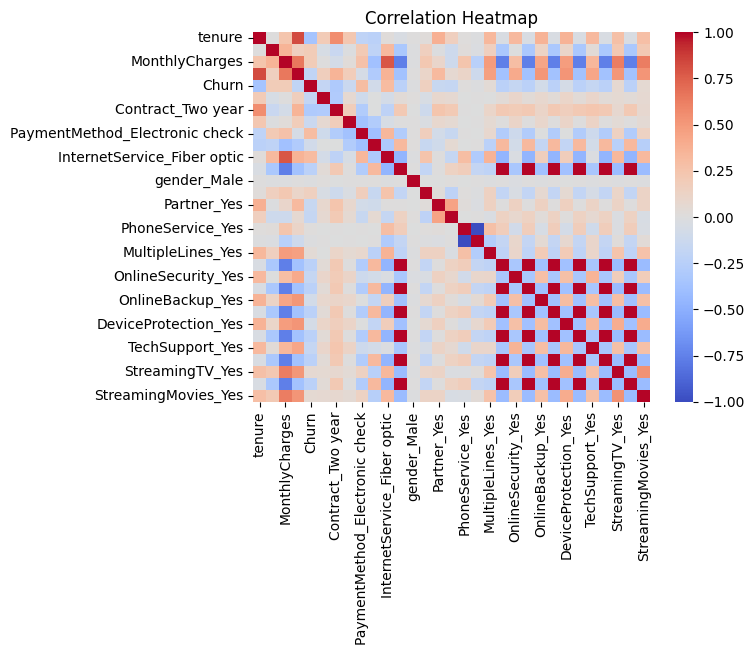

In [ ]:
sns.heatmap(df_encoded.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

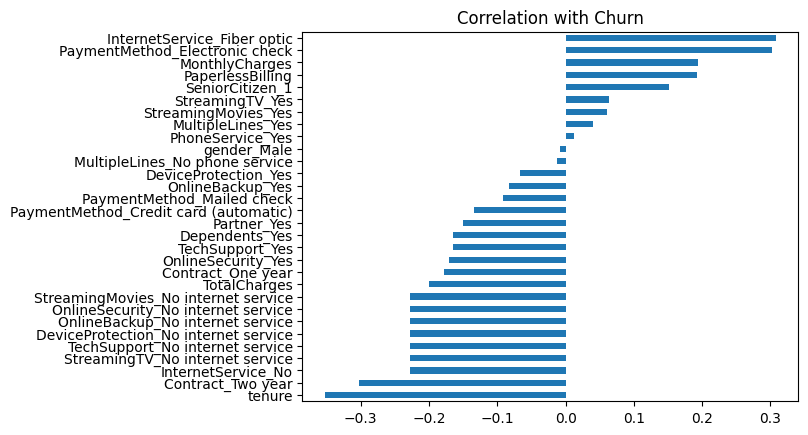

In [ ]:
correlations.drop('Churn').sort_values().plot(kind='barh')
plt.title('Correlation with Churn')
plt.show()

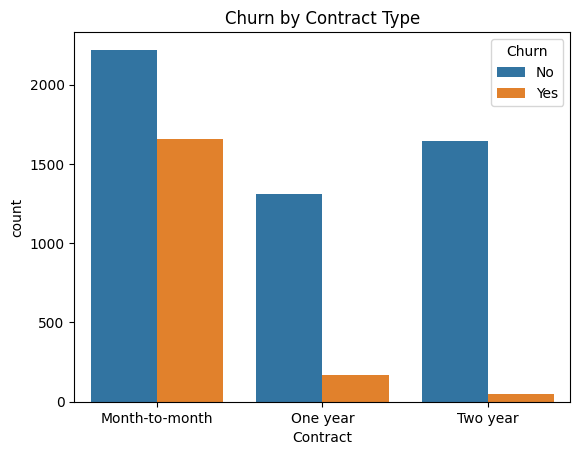

In [ ]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.show()

In [ ]:
print(df.groupby(['Contract', 'Churn']).size().unstack())

Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1307   166
Two year        1647    48


In [ ]:
churn_rate = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()['Yes']
print(churn_rate)

Contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: Yes, dtype: float64


In [ ]:
print(df[['Contract', 'Churn']].head())
print(df.dtypes)

         Contract Churn
0  Month-to-month    No
1        One year    No
2  Month-to-month   Yes
3        One year    No
4  Month-to-month   Yes
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


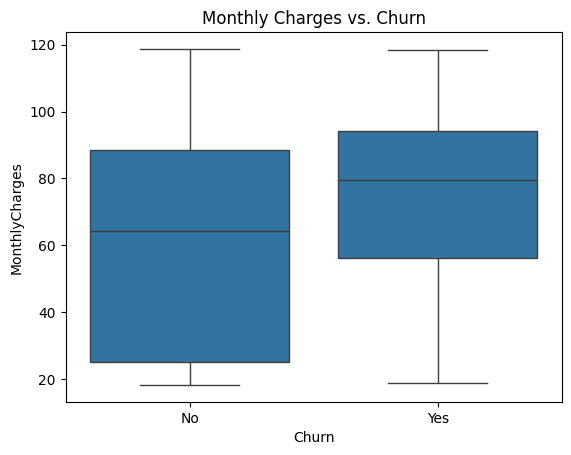

In [ ]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs. Churn')
plt.savefig('monthlycharges_vs_churn.png')
plt.show()

In [ ]:
print(df.groupby('Churn')['MonthlyCharges'].describe())

        count       mean        std    min    25%     50%   75%     max
Churn                                                                  
No     5174.0  61.265124  31.092648  18.25  25.10  64.425  88.4  118.75
Yes    1869.0  74.441332  24.666053  18.85  56.15  79.650  94.2  118.35
